In [1]:
import pandas as pd
from statistics import mean
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans 


In [2]:
ipl=pd.read_csv("ipl_batsman.csv", index_col=None)
ipl
cur_ipl = pd.read_csv("current_batsman.csv")
cur_ipl

,Player,match,NO,Run,Hs,ave,BF,SR,100,50,4s,6s,CT,ST
0,V Kohli,14,3,530,92,48.18,381,139.10,0,4,52,18,8,0
1,RG Sharma,14,2,286,94,23.83,215,133.02,0,2,25,12,8,0
2,G Gambhir,16,4,498,76,41.50,389,128.02,0,4,61,7,6,0
3,RV Uthappa,16,0,351,54,21.93,265,132.45,0,1,30,21,5,0
4,S Dhawan,16,3,497,92,38.23,363,136.91,0,4,59,14,12,0
5,MS Dhoni,16,9,455,79,75.83,302,150.66,0,3,24,30,11,3
6,DA Warner,14,3,641,126,58.27,452,141.81,1,4,63,26,10,0
7,CH Gayle,11,2,368,104,40.88,252,146.03,1,3,30,27,2,0
8,AB de Villiers,12,2,480,90,53.33,275,174.54,0,6,39,30,6,0
9,AM Rahane,15,1,370,65,28.46,313,118.21,0,1,39,5,4,0


In [3]:
player=ipl['Player']
match=ipl['Mat']
innings=ipl['Inns']
not_out=ipl["NO"]
run=ipl["Runs"]
highest_score=ipl["HS"]
avg=ipl["Ave"]
ball=ipl['BF']
sr=ipl["SR"]
cen=ipl["100"]
hc=ipl["50"]
four=ipl["4s"]
six=ipl["6s"]


c_match=cur_ipl['match']
c_not_out=cur_ipl["NO"]
c_run=cur_ipl["Run"]
c_highest_score=cur_ipl["Hs"]
c_avg=cur_ipl["ave"]
c_ball=cur_ipl['BF']
c_sr=cur_ipl["SR"]
c_cen=cur_ipl["100"]
c_hc=cur_ipl["50"]
c_four=cur_ipl["4s"]
c_six=cur_ipl["6s"]   


In [4]:
Hard_Hit = (4 * four + 6 * six)/ball
run_wicket = (run - (four*4+six*6))/(ball - (four + six))
mean_avg = avg.mean()
mean_sr = sr.mean()
mean_hard = Hard_Hit.mean()
mean_run_wicket = run_wicket.mean()

c_Hard_Hit = (4 * c_four + 6 * c_six)/c_ball
c_run_wicket = (c_run - (c_four*4+c_six*6))/(c_ball - (c_four +c_six))
c_mean_avg = c_avg.mean()
c_mean_sr = c_sr.mean()
c_mean_hard = c_Hard_Hit.mean()
c_mean_run_wicket = c_run_wicket.mean()


In [5]:
cost_sr = [] 
for i in range(0,len(player)):
    loc_sr = (sr[i]/mean_sr)*100
    cost_sr.append(loc_sr)

cost_avg = []
for i in range(0,len(player)):
    loc_avg = (avg[i]/mean_avg)*100
    cost_avg.append(loc_avg)   

cost_hard = []
for i in range(0,len(player)):
    loc_hard = (Hard_Hit[i]/mean_hard)*100
    cost_hard.append(loc_hard)

cost_run_wicket = []
for i in range(0,len(player)):
    loc_run = (run_wicket[i]/mean_run_wicket)*100
    cost_run_wicket.append(loc_run)  

    
#FOR THE CURRENT FORM
c_cost_sr = [] 
for i in range(0,len(player)):
    c_loc_sr = (c_sr[i]/c_mean_sr)*100
    c_cost_sr.append(c_loc_sr)

c_cost_avg = []
for i in range(0,len(player)):
    c_loc_avg = (c_avg[i]/c_mean_avg)*100
    c_cost_avg.append(c_loc_avg)   

c_cost_hard = []
for i in range(0,len(player)):
    c_loc_hard = (c_Hard_Hit[i]/c_mean_hard)*100
    c_cost_hard.append(c_loc_hard)

c_cost_run_wicket = []
for i in range(0,len(player)):
    c_loc_run = (c_run_wicket[i]/c_mean_run_wicket)*100
    c_cost_run_wicket.append(c_loc_run) 


In [6]:
mean_inn = innings.mean()
#print(mean_inn)
x_fact = []
for i in range(0, len(player)):
        exp = innings[i]/mean_inn
        x_fact.append(exp)      
    
print(x_fact)



[1.4153404643882077, 1.5340464388207669, 1.387946777980694, 1.451865379598226, 1.2966344899556483, 1.4427341507957212, 1.0409600834855204, 1.0135663970780067, 1.177928515523089, 1.0866162274980433, 1.3696843203756848, 1.0318288546830159, 1.3331594051656666, 1.1231411427080615, 0.9953039394729976, 0.3469866944951735, 1.114009913905557, 0.9222541090529611, 0.9953039394729976, 1.1048786851030523, 1.1231411427080615, 0.7031046177928515, 0.7031046177928515, 1.0866162274980433, 0.6665797025828333, 0.776154448212888, 0.8218105922254109, 0.8583355074354291, 0.566136185755283, 0.47482389773023737, 0.6209235585703105, 0.4017740673102009, 0.6574484737803287, 0.8492042786329246, 1.5066527524132534]


In [7]:
import numpy as np
x_factarr=np.array(x_fact)
mean_x_fact=x_factarr.mean()
print(mean_x_fact)  

x_fact_more=[]
x_fact_less=[]
for i in range(0, len(player)):
    if(x_fact[i]>=mean_x_fact):
        x_fact_more.append(x_fact[i])
    else:
        x_fact_less.append(x_fact[i])
print(x_fact_more)
print(x_fact_less)
x_fact_morearr=np.array(x_fact_more)
x_fact_lessarr=np.array(x_fact_less)
x_fact_more_mean=x_fact_morearr.mean()
x_fact_less_mean=x_fact_lessarr.mean()
print(x_fact_more_mean)
print(x_fact_less_mean)
cost_x_fact=[]
for i in range(0, len(player)):
    if(x_fact[i]>=mean_x_fact):
        cost_x_fact.append(x_fact_more_mean)
    else:
        cost_x_fact.append(x_fact_less_mean)
print(pd.Series(cost_x_fact, index=player))          

1.0
[1.4153404643882077, 1.5340464388207669, 1.387946777980694, 1.451865379598226, 1.2966344899556483, 1.4427341507957212, 1.0409600834855204, 1.0135663970780067, 1.177928515523089, 1.0866162274980433, 1.3696843203756848, 1.0318288546830159, 1.3331594051656666, 1.1231411427080615, 1.114009913905557, 1.1048786851030523, 1.1231411427080615, 1.0866162274980433, 1.5066527524132534]
[0.9953039394729976, 0.3469866944951735, 0.9222541090529611, 0.9953039394729976, 0.7031046177928515, 0.7031046177928515, 0.6665797025828333, 0.776154448212888, 0.8218105922254109, 0.8583355074354291, 0.566136185755283, 0.47482389773023737, 0.6209235585703105, 0.4017740673102009, 0.6574484737803287, 0.8492042786329246]
1.2442500720886485
0.70995303939473
Player
V Kohli           1.244250
RG Sharma         1.244250
G Gambhir         1.244250
RV Uthappa        1.244250
S Dhawan          1.244250
MS Dhoni          1.244250
DA Warner         1.244250
CH Gayle          1.244250
AB de Villiers    1.244250
AM Rahane    

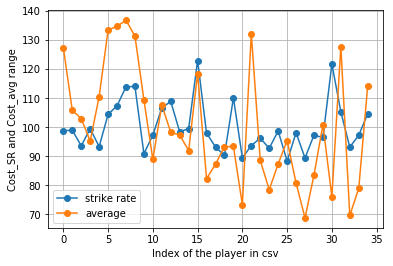

In [8]:
index = []
for i in range(len(player)):
    index.append(i)
import matplotlib.pyplot as plt
plt.plot(index,cost_sr,'-o')
plt.plot(index,cost_avg,'-o')
plt.xlabel("Index of the player in csv")
plt.ylabel("Cost_SR and Cost_avg range")

plt.grid()
plt.legend(['strike rate','average'])
plt.show()

Text(0,0.5,'Cost_Hard hitting and Cost_running range')

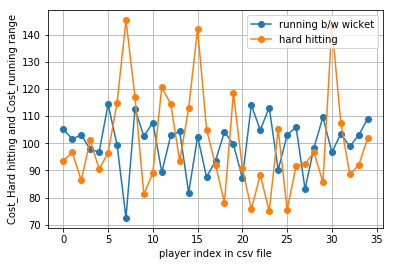

In [9]:
plt.plot(index,cost_run_wicket,'-o')
plt.plot(index,cost_hard,'-o')
plt.grid()
plt.legend(['running b/w wicket','hard hitting'])
plt.xlabel("player index in csv file")
plt.ylabel("Cost_Hard hitting and Cost_running range")

In [10]:
credit = []
for i in range(0,len(player)):
    credit.append(cost_sr[i] + cost_avg[i] + cost_hard[i]  + cost_run_wicket[i])
#print(pd.Series(credit, index=player))  

m_credit = np.array(credit)
mean_credit = m_credit.mean()
#FOR CURRENT FORM

c_credit = []
for i in range(0,len(player)):
    c_credit.append(c_cost_sr[i] + c_cost_avg[i] + c_cost_hard[i]  + c_cost_run_wicket[i])
#print(pd.Series(c_credit, index=player))

final_credit = []
for i in range(0,len(player)):
    final_cr = 0
    final_cr = credit[i]*(c_credit[i]/mean_credit) + c_credit[i]
    final_credit.append(final_cr)
print(pd.Series(final_credit,index = player))


Player
V Kohli            933.311256
RG Sharma          732.797629
G Gambhir          803.377383
RV Uthappa         697.470922
S Dhawan           822.482988
MS Dhoni          1184.710786
DA Warner         1041.032485
CH Gayle           940.809774
AB de Villiers    1189.134775
AM Rahane          684.892405
KD Karthik         937.515800
SR Watson          939.094734
YK Pathan          769.194964
AT Rayudu          902.803296
BB McCullum        792.607647
Risabh Pant       1192.162587
Yuvraj Singh       438.060838
M Vijay            727.797254
MK Pandey          645.111441
KA Pollard         717.288564
PA Patel           690.512335
JP Duminy          621.741148
SV Samson          781.780720
RA Jadeja          612.653148
AJ Finch           678.948977
MK Tiwary          765.872179
WP Saha            601.857951
NV Ojha            610.967867
KK Nair            732.767085
F du Plessis       735.704629
GJ Maxwell         735.579536
KL Rahul          1079.560886
Mandeep Singh      709.212054
DJ 

In [11]:
credit_up = [] 
for i in range(0,len(player)):
    
        credit_up.append(final_credit[i]* cost_x_fact[i])
d ={}
for i in range(len(player)):
    d.update({player[i]:credit_up[i]})
#print(d)
sorted_d = sorted(d.items(), key = lambda x: x[1], reverse = True)
sorted_d


[('AB de Villiers', 1479.5810290152738),
 ('MS Dhoni', 1474.0764805218041),
 ('DA Warner', 1295.304744477602),
 ('CH Gayle', 1170.602629692585),
 ('SR Watson', 1168.468691035969),
 ('KD Karthik', 1166.5041017822045),
 ('V Kohli', 1161.272597810609),
 ('AT Rayudu', 1123.3130655792952),
 ('S Raina', 1046.0443123212674),
 ('S Dhawan', 1023.3745168251652),
 ('G Gambhir', 999.6023661202938),
 ('YK Pathan', 957.0708895250623),
 ('RG Sharma', 911.7835025146516),
 ('KA Pollard', 892.4863477509851),
 ('RV Uthappa', 867.828245102996),
 ('PA Patel', 859.1700232017713),
 ('AM Rahane', 852.1774246497286),
 ('Risabh Pant', 846.3794519692758),
 ('KL Rahul', 766.437532396801),
 ('RA Jadeja', 762.2937235387717),
 ('DJ Bravo', 609.8011156746053),
 ('BB McCullum', 562.7142081284805),
 ('SV Samson', 555.0275984898244),
 ('Yuvraj Singh', 545.0572293268874),
 ('MK Tiwary', 543.7332815172156),
 ('F du Plessis', 522.3157373373336),
 ('GJ Maxwell', 522.2269271776423),
 ('KK Nair', 520.230218877248),
 ('M Vijay

In [12]:
# import matplotlib.pyplot as plt
# plt.pie(credit_up)
# plt.show()

In [13]:
curr_opener=[]
for i in range(0, len(player)):
    c_b=(c_cost_sr[i]*3 +(c_run[i]/c_match[i])+ (c_hc[i]/c_match[i])*500 +c_cen[i]*5)
    
    curr_opener.append(c_b)
#print(opener,index=player)    
#print(pd.Series(opener, index=player))
#hc
c_o ={}
for i in range(len(player)):
    c_o.update({player[i]:curr_opener[i]})
#print(d)
sorted_co = sorted(c_o.items(), key = lambda x: x[1], reverse = True)

#sorted_co

In [14]:
opener=[]
for i in range(0, len(player)):
    b=(cost_sr[i]*3 +cost_avg[i]*3 +(hc[i]/innings[i])*500 +cen[i]*5)*x_fact[i]
    opener.append(b)
    
add_opener = 0
for i in range(len(opener)):
    add_opener += opener[i]
mean_opener = add_opener/len(opener) 

final_opener = []
for i in range(len(opener)):
    final = 0
    final = opener[i]*(curr_opener[i]/mean_opener) + curr_opener[i]
    final_opener.append(final)
#print(final_opener)

# df = pd.DataFrame({"Opener":player, "Points":final_opener})
# df.to_csv("Opener_points.csv", encoding = 'utf8', index = False)

o ={}
for i in range(len(player)):
    o.update({player[i]:final_opener[i]})
#print(d)
sorted_o = sorted(o.items(), key = lambda x: x[1], reverse = True)

sorted_o

[('AB de Villiers', 1685.1710138521028),
 ('V Kohli', 1312.0385482272138),
 ('MS Dhoni', 1207.9103912789071),
 ('DA Warner', 1207.3201715942334),
 ('CH Gayle', 1159.9380577702993),
 ('S Raina', 1134.9219235487826),
 ('S Dhawan', 1094.174174168198),
 ('G Gambhir', 1075.8744407515744),
 ('RG Sharma', 1015.4550757874006),
 ('AT Rayudu', 979.7796231453838),
 ('SR Watson', 964.3548439137428),
 ('KD Karthik', 940.1380809881337),
 ('KL Rahul', 906.378224575172),
 ('M Vijay', 893.4031644719256),
 ('Risabh Pant', 879.7690407995808),
 ('BB McCullum', 859.4083950131801),
 ('RV Uthappa', 832.7689592523375),
 ('KA Pollard', 759.1424382102382),
 ('PA Patel', 725.818609777467),
 ('SV Samson', 715.424874070141),
 ('MK Pandey', 709.8148982400525),
 ('YK Pathan', 707.0183506881149),
 ('AM Rahane', 685.7318967379024),
 ('MK Tiwary', 657.8183320218885),
 ('DJ Bravo', 649.2201440679576),
 ('KK Nair', 610.2461354014088),
 ('F du Plessis', 572.6013286076952),
 ('GJ Maxwell', 515.8437222423427),
 ('AJ Finch',

In [15]:
curr_mid_order=[]
for i in range(0, len(player)):
    c_b=(c_cost_sr[i]*5 + (c_hc[i]/c_match[i])*500 +c_cen[i]*10 +c_cost_avg[i]*4+ c_cost_run_wicket[i]*5+ c_cost_hard[i] )
    curr_mid_order.append(c_b)
    

c_mo ={}
for i in range(len(player)):
    c_mo.update({player[i]:curr_mid_order[i]})
#print(d)
sorted_cmo = sorted(c_mo.items(), key = lambda x: x[1], reverse = True)

#sorted_cmo
curr_mid_order

[1858.206489663606,
 1435.6435968015332,
 1687.5341040647681,
 1271.1011994439484,
 1660.8760110958342,
 2215.492929940386,
 1971.0309654568655,
 1645.807462288921,
 2213.4423808284137,
 1406.186075568972,
 1886.912699908457,
 1722.9042046199309,
 1404.8126754589148,
 1746.9026083569324,
 1524.0159826129307,
 2111.8773601009875,
 860.7939589573734,
 1626.7976601787943,
 1474.2584183580093,
 1344.9064128670109,
 1446.9104957227498,
 1198.66222951605,
 1659.4107780355869,
 1323.5133490439894,
 1336.2236889190679,
 1587.457598822123,
 1150.7993760132963,
 1411.8095012951544,
 1516.0159600490322,
 1450.4780293022438,
 1266.9885321372374,
 2074.8374832917148,
 1474.9163650575495,
 1661.080044632597,
 1678.049493245151]

In [16]:
mid_order=[]
for i in range(0, len(player)):
    b=(cost_sr[i]*5 + (hc[i]/innings[i])*500 +cen[i]*10 +cost_avg[i]*4+ cost_run_wicket[i]*5+ cost_hard[i] )*x_fact[i] 
    mid_order.append(b)
    
add_mid = 0
for i in range(len(mid_order)):
    add_mid += mid_order[i]
mean_mid = add_mid/len(mid_order) 

final_mid = []
for i in range(len(mid_order)):
    final_m = 0
    final_m = mid_order[i]*(curr_mid_order[i]/mean_mid) + curr_mid_order[i]
    final_mid.append(final_m)

    
# df =pd.DataFrame({"Middle": player, "Points": final_mid})  
# df.to_csv("middle_points.csv", encoding = 'utf-8', index = False)
    
mo ={}
for i in range(len(player)):
    mo.update({player[i]:final_mid[i]})
#print(d)
sorted_mo = sorted(mo.items(), key = lambda x: x[1], reverse = True)

sorted_mo    

[('MS Dhoni', 5818.300588839847),
 ('AB de Villiers', 5361.264006151776),
 ('V Kohli', 4799.18553573646),
 ('DA Warner', 4398.660309827583),
 ('KD Karthik', 4369.219351902445),
 ('S Raina', 4302.792952809623),
 ('G Gambhir', 4051.811529063332),
 ('S Dhawan', 3828.5006811042144),
 ('RG Sharma', 3704.8880220684077),
 ('AT Rayudu', 3696.938441607602),
 ('SR Watson', 3564.3287398221155),
 ('CH Gayle', 3531.5248336174727),
 ('YK Pathan', 3319.1506949906357),
 ('RV Uthappa', 3064.2902261359436),
 ('KL Rahul', 3008.6841774351437),
 ('M Vijay', 3007.8946231713207),
 ('Risabh Pant', 2970.7717731382254),
 ('AM Rahane', 2953.609974863344),
 ('DJ Bravo', 2938.719186123691),
 ('BB McCullum', 2927.46583240811),
 ('MK Pandey', 2852.096565569045),
 ('KA Pollard', 2839.5120073863372),
 ('PA Patel', 2791.9376953538776),
 ('SV Samson', 2780.4083040425944),
 ('MK Tiwary', 2718.253906360661),
 ('RA Jadeja', 2610.4575905143975),
 ('NV Ojha', 2376.7176934494646),
 ('KK Nair', 2322.582380052049),
 ('Mandeep S

In [17]:
curr_finisher=[]
for i in range(0, len(player)):
    c_b=c_cost_sr[i]*4+c_cost_hard[i]*5+(c_not_out[i])*3 + c_cost_run_wicket[i]*2
    
    curr_finisher.append(c_b)
    
c_f ={}
for i in range(len(player)):
    c_f.update({player[i]:curr_finisher[i]})
#print(d)
sorted_cf = sorted(c_f.items(), key = lambda x: x[1], reverse = True)

#sorted_cf    

In [18]:
finisher=[]
for i in range(0, len(player)):
    b=cost_sr[i]*4+cost_hard[i]*5+(not_out[i])*3 + cost_run_wicket[i]*2 
    
    finisher.append(b)
    
add_finisher = 0
for i in range(len(finisher)):
    add_finisher += finisher[i]
mean_finisher = add_finisher/len(finisher) 

final_finisher = []
for i in range(len(finisher)):
    final_f = 0
    final_f = finisher[i]*(curr_finisher[i]/mean_finisher) + curr_finisher[i]
    final_finisher.append(final_f)
    

# df =pd.DataFrame({"Finisher": player, "Points": final_finisher})  
# df.to_csv("finisher_points.csv", encoding = 'utf-8', index = False)
    
f ={}
for i in range(len(player)):
    f.update({player[i]:final_finisher[i]})
#print(d)
sorted_f = sorted(f.items(), key = lambda x: x[1], reverse = True)

sorted_f    



[('Risabh Pant', 3299.8569594654496),
 ('AB de Villiers', 3217.9382437915774),
 ('CH Gayle', 2742.5926447623087),
 ('KL Rahul', 2717.172956037016),
 ('SR Watson', 2712.375079901434),
 ('MS Dhoni', 2661.8530622363505),
 ('DJ Bravo', 2598.483063283492),
 ('GJ Maxwell', 2587.5645311363924),
 ('AT Rayudu', 2493.2835120195678),
 ('DA Warner', 2445.3871530660263),
 ('BB McCullum', 2433.5032338333535),
 ('KD Karthik', 2393.343368009291),
 ('KA Pollard', 2334.7863816453896),
 ('YK Pathan', 2281.8671500426),
 ('V Kohli', 2270.4845142748964),
 ('S Raina', 2214.647021237306),
 ('RV Uthappa', 2205.1144959406865),
 ('S Dhawan', 2202.4744774728333),
 ('RG Sharma', 2174.7409663565622),
 ('KK Nair', 2108.5262989726657),
 ('MK Tiwary', 2099.597442904901),
 ('SV Samson', 2089.3773937452333),
 ('AJ Finch', 2089.285623434007),
 ('PA Patel', 2076.168555170124),
 ('Mandeep Singh', 2030.2285382389564),
 ('G Gambhir', 1997.341837105482),
 ('F du Plessis', 1969.0619861867706),
 ('WP Saha', 1929.4380646051295),

In [19]:
cr=np.array(credit_up)
crmean=cr.mean()
crmeanup=[]
crmeanless=[]
for i in range(0,len(player)):
    if(credit_up[i]>=crmean):
        crmeanup.append(credit_up[i])
    else:
        crmeanless.append(credit_up[i])
crup=np.array(crmeanup)
crless=np.array(crmeanless)
crupmean=crup.mean()
crlessmean=crless.mean()
print(crupmean)
print(crlessmean)

1071.9466899942524
539.56022409459


In [20]:
point=[]
for i in range(0,len(player)):
    if(credit_up[i]>=crupmean):
        point.append(10)
    elif(credit_up[i]<crupmean and credit_up[i]>=crmean ):
        point.append(9)
    elif(credit_up[i]<crmean and credit_up[i]>=crlessmean):
        point.append(8)
    else:
        point.append(7)
print(len(point))        
pd.Series(point, index=player)        

35


Player
V Kohli           10
RG Sharma          9
G Gambhir          9
RV Uthappa         9
S Dhawan           9
MS Dhoni          10
DA Warner         10
CH Gayle          10
AB de Villiers    10
AM Rahane          9
KD Karthik        10
SR Watson         10
YK Pathan          9
AT Rayudu         10
BB McCullum        8
Risabh Pant        9
Yuvraj Singh       8
M Vijay            7
MK Pandey          7
KA Pollard         9
PA Patel           9
JP Duminy          7
SV Samson          8
RA Jadeja          8
AJ Finch           7
MK Tiwary          8
WP Saha            7
NV Ojha            7
KK Nair            7
F du Plessis       7
GJ Maxwell         7
KL Rahul           8
Mandeep Singh      7
DJ Bravo           8
S Raina            9
dtype: int64

In [21]:
c ={}
for i in range(len(player)):
    c.update({player[i]:point[i]})
#print(d)
sorted_c = sorted(c.items(), key = lambda x: x[1], reverse = True)

sorted_c

[('V Kohli', 10),
 ('MS Dhoni', 10),
 ('DA Warner', 10),
 ('CH Gayle', 10),
 ('AB de Villiers', 10),
 ('KD Karthik', 10),
 ('SR Watson', 10),
 ('AT Rayudu', 10),
 ('RG Sharma', 9),
 ('G Gambhir', 9),
 ('RV Uthappa', 9),
 ('S Dhawan', 9),
 ('AM Rahane', 9),
 ('YK Pathan', 9),
 ('Risabh Pant', 9),
 ('KA Pollard', 9),
 ('PA Patel', 9),
 ('S Raina', 9),
 ('BB McCullum', 8),
 ('Yuvraj Singh', 8),
 ('SV Samson', 8),
 ('RA Jadeja', 8),
 ('MK Tiwary', 8),
 ('KL Rahul', 8),
 ('DJ Bravo', 8),
 ('M Vijay', 7),
 ('MK Pandey', 7),
 ('JP Duminy', 7),
 ('AJ Finch', 7),
 ('WP Saha', 7),
 ('NV Ojha', 7),
 ('KK Nair', 7),
 ('F du Plessis', 7),
 ('GJ Maxwell', 7),
 ('Mandeep Singh', 7)]

In [26]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans 
import pandas as pd

file_total=pd.read_csv("score vs price.csv")
file_opener = pd.read_csv("Opener_points.csv")
file_mid = pd.read_csv("middle_points.csv")
file_finisher = pd.read_csv("finisher_points.csv")
file_opener

,Opener,Points,Price
0,V Kohli,1312.038548,170000000
1,RG Sharma,1015.455076,150000000
2,G Gambhir,1075.874441,28000000
3,RV Uthappa,832.768959,64000000
4,S Dhawan,1094.174174,52000000
5,MS Dhoni,1207.910391,150000000
6,DA Warner,1207.320172,120000000
7,CH Gayle,1159.938058,20000000
8,AB de Villiers,1685.171014,110000000
9,AM Rahane,685.731897,40000000


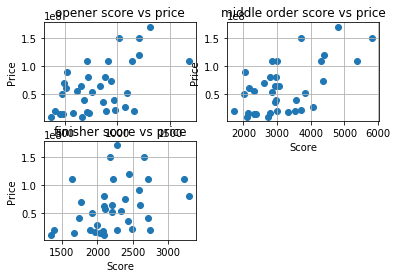

In [35]:
# player=file_total["Player"]
# price=file_total["Price"]
# score=file_total["score"]

oplayer=file_opener["Opener"]
oprice=file_opener["Price"]
oscore=file_opener["Points"]

player=file_mid["Middle"]
mprice=file_mid["Price"]
mscore=file_mid["Points"]

fplayer=file_finisher["Finisher"]
fprice=file_finisher["Price"]
fscore=file_finisher["Points"]


titles = ['opener score vs price', 'middle order score vs price', 'finisher score vs price' ]
abscissa = [oscore,mscore,fscore]
ordinate = [oprice,mprice,fprice]

for i in range(3):
    plt.subplot(2,2,i+1)
    plt.scatter(abscissa[i],ordinate[i])
    plt.grid()
    plt.xlabel("Score")
    plt.ylabel("Price")
    plt.title(titles[i])



In [31]:
len(player)

35

In [37]:
# tot = []
# for i in range(len(player)):
#     ar = []
#     ar.append(score[i])
#     ar.append(price[i])
#     tot.append(ar) 
# X=np.array(tot)


o_train = []
for i in range(len(player)):
    aro = []
    aro.append(oscore[i])
    aro.append(oprice[i])
    o_train.append(aro) 
O=np.array(o_train)

m_train = []
for i in range(len(player)):
    arm = []
    arm.append(mscore[i])
    arm.append(mprice[i])
    m_train.append(arm) 
M=np.array(m_train)

f_train = []
for i in range(len(player)):
    arf = []
    arf.append(fscore[i])
    arf.append(fprice[i])
    f_train.append(arf) 
F=np.array(f_train)

In [39]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(O)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[7.77279153e+02 4.68571429e+07]
 [1.12872125e+03 1.12000000e+08]
 [1.17846800e+03 1.56666667e+08]
 [7.06203457e+02 1.75000000e+07]
 [6.91959672e+02 7.30000000e+07]]
[2 2 3 4 0 2 1 3 1 0 4 0 3 3 0 4 3 3 1 0 3 3 4 4 4 3 0 3 0 3 4 1 3 4 1]


## Clusterring for Openers -- 5 clusters

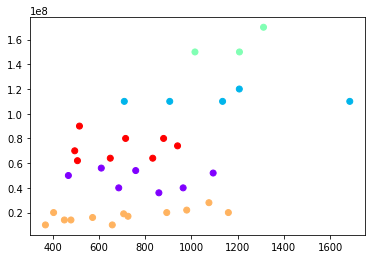

In [40]:
plt.scatter(O[:,0],O[:,1], c = kmeans.labels_, cmap= 'rainbow')

In [44]:
kmeans.fit(M)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[3.98469960e+03 1.12000000e+08]
 [2.92414981e+03 4.68571429e+07]
 [2.81542582e+03 1.75000000e+07]
 [2.86990196e+03 7.30000000e+07]
 [4.77412472e+03 1.56666667e+08]]
[4 4 2 3 1 4 0 2 0 1 3 1 2 2 1 3 2 2 0 1 2 2 3 3 3 2 1 2 1 2 3 0 2 3 0]


## Clusterring for Middle Order -- 5 clusters


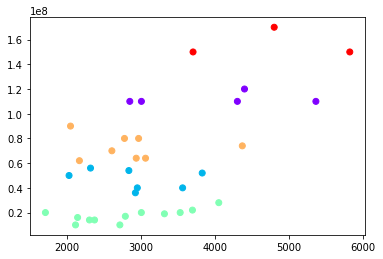

In [45]:
plt.scatter(M[:,0],M[:,1], c = kmeans.labels_, cmap= 'rainbow')

In [46]:
kmeans.fit(F)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[1.99971287e+03 1.75000000e+07]
 [2.44765243e+03 1.12000000e+08]
 [2.37976765e+03 7.30000000e+07]
 [2.36902618e+03 1.56666667e+08]
 [2.20886551e+03 4.68571429e+07]]
[3 3 0 2 4 3 1 0 1 4 2 4 0 0 4 2 0 0 1 4 0 0 2 2 2 0 4 0 4 0 2 1 0 2 1]


## Clusterring for Finisher -- 5 clusters

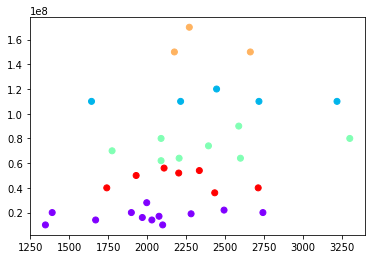

In [47]:
plt.scatter(F[:,0],F[:,1], c = kmeans.labels_ , cmap = 'rainbow')